In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rc("figure", facecolor="white")
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
%matplotlib inline
import pymannkendall as mk

In [22]:
data18 = pd.read_csv('Precipitation data(csv)/Preci18.csv')
data19 = pd.read_csv('Precipitation data(csv)/Preci19.csv')
data20 = pd.read_csv('Precipitation data(csv)/Preci20.csv')
masterdata = pd.concat([data18,data19,data20])
masterdata = masterdata.reset_index()
del masterdata['Unnamed: 0']
del masterdata['index']

In [23]:
masterdata

Date  precipitationCal Month_name
0      2018-06-01 00:00:00             0.036       June
1      2018-06-01 00:30:00             0.056       June
2      2018-06-01 01:00:00             0.065       June
3      2018-06-01 01:30:00             0.051       June
4      2018-06-01 02:00:00             0.030       June
...                    ...               ...        ...
11995  2020-08-10 21:30:00             1.841     August
11996  2020-08-10 22:00:00             1.599     August
11997  2020-08-10 22:30:00             2.377     August
11998  2020-08-10 23:00:00             2.321     August
11999  2020-08-10 23:30:00             2.251     August

[12000 rows x 3 columns]

In [24]:
masterdata['Date'] = masterdata['Date'].astype('datetime64')
masterdata['doy'] = masterdata['Date'].dt.dayofyear.astype(str) + '-' + masterdata['Date'].dt.hour.astype(str) + '-' + masterdata['Date'].dt.minute.astype(str)
masterdata['Y'] = masterdata['Date'].dt.year
masterdata=masterdata.sort_values(by='Date')
masterdata.head()

Date  precipitationCal Month_name       doy     Y
0 2018-06-01 00:00:00             0.036       June   152-0-0  2018
1 2018-06-01 00:30:00             0.056       June  152-0-30  2018
2 2018-06-01 01:00:00             0.065       June   152-1-0  2018
3 2018-06-01 01:30:00             0.051       June  152-1-30  2018
4 2018-06-01 02:00:00             0.030       June   152-2-0  2018

In [25]:
piv =masterdata.pivot(index = 'doy', columns = 'Y', values = 'precipitationCal')
piv['plotdate'] = piv.index
piv['plotdate'] = pd.to_datetime(piv.plotdate,format='%j-%H-%M')
piv

Y          2018   2019  2020            plotdate
doy                                             
152-0-0   0.036  0.000   NaN 1900-06-01 00:00:00
152-0-30  0.056  0.000   NaN 1900-06-01 00:30:00
152-1-0   0.065  0.000   NaN 1900-06-01 01:00:00
152-1-30  0.051  0.000   NaN 1900-06-01 01:30:00
152-10-0  6.418  0.000   NaN 1900-06-01 10:00:00
...         ...    ...   ...                 ...
243-7-30    NaN  1.560   NaN 1900-08-31 07:30:00
243-8-0     NaN  2.217   NaN 1900-08-31 08:00:00
243-8-30    NaN  2.218   NaN 1900-08-31 08:30:00
243-9-0     NaN  1.941   NaN 1900-08-31 09:00:00
243-9-30    NaN  1.243   NaN 1900-08-31 09:30:00

[4416 rows x 4 columns]

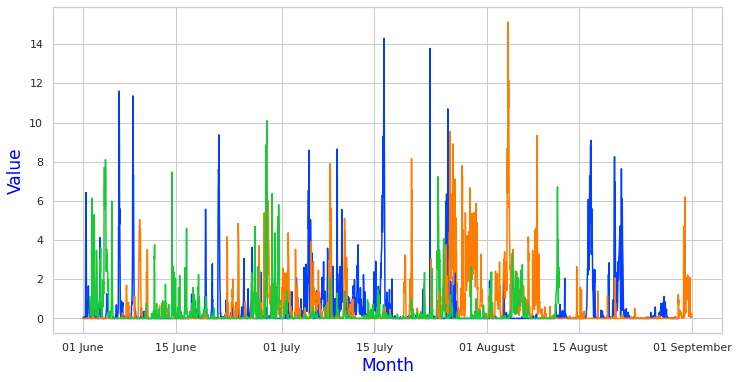

In [26]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.lineplot(piv.plotdate, piv[2018])
sns.lineplot(piv.plotdate, piv[2019])
sns.lineplot(piv.plotdate, piv[2020])
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.show()

In [27]:
pivday=piv.groupby(piv.plotdate.dt.dayofyear).mean()

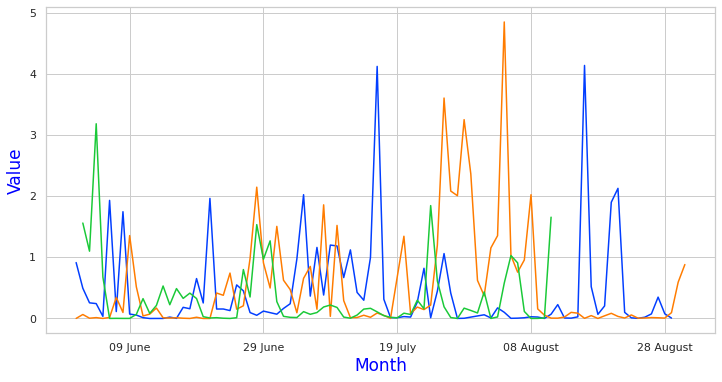

In [28]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.lineplot(pivday.index, pivday[2018])
sns.lineplot(pivday.index, pivday[2019])
sns.lineplot(pivday.index, pivday[2020])
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.show()

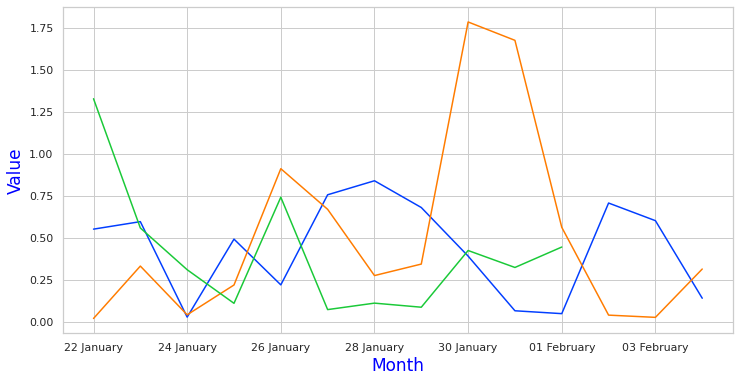

In [29]:
pivweek=piv.groupby(piv.plotdate.dt.week).mean()
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.lineplot(pivweek.index, pivweek[2018])
sns.lineplot(pivweek.index, pivweek[2019])
sns.lineplot(pivweek.index, pivweek[2020])
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.show()

In [30]:
piv['18sum'] = piv[2018].cumsum()
piv['19sum'] = piv[2019].cumsum()
piv['20sum'] = piv[2020].cumsum()
piv['month'] = piv.plotdate.dt.month
piv['week'] = piv.plotdate.dt.week
piv

Y          2018   2019  2020            plotdate  18sum     19sum  20sum  \
doy                                                                        
152-0-0   0.036  0.000   NaN 1900-06-01 00:00:00  0.036     0.000    NaN   
152-0-30  0.056  0.000   NaN 1900-06-01 00:30:00  0.092     0.000    NaN   
152-1-0   0.065  0.000   NaN 1900-06-01 01:00:00  0.157     0.000    NaN   
152-1-30  0.051  0.000   NaN 1900-06-01 01:30:00  0.208     0.000    NaN   
152-10-0  6.418  0.000   NaN 1900-06-01 10:00:00  6.626     0.000    NaN   
...         ...    ...   ...                 ...    ...       ...    ...   
243-7-30    NaN  1.560   NaN 1900-08-31 07:30:00    NaN  2396.485    NaN   
243-8-0     NaN  2.217   NaN 1900-08-31 08:00:00    NaN  2398.702    NaN   
243-8-30    NaN  2.218   NaN 1900-08-31 08:30:00    NaN  2400.920    NaN   
243-9-0     NaN  1.941   NaN 1900-08-31 09:00:00    NaN  2402.861    NaN   
243-9-30    NaN  1.243   NaN 1900-08-31 09:30:00    NaN  2404.104    NaN   

Y         month  week  
doy                    
152-0-0       6    22  
152-0-30      6    22  
152-1-0       6    22  
152-1-30      6    22  
152-10-0      6    22  
...         ...   ...  
243-7-30      8    35  
243-8-0       8    35  
243-8-30      8    35  
243-9-0       8    35  
243-9-30      8    35  

[4416 rows x 9 columns]

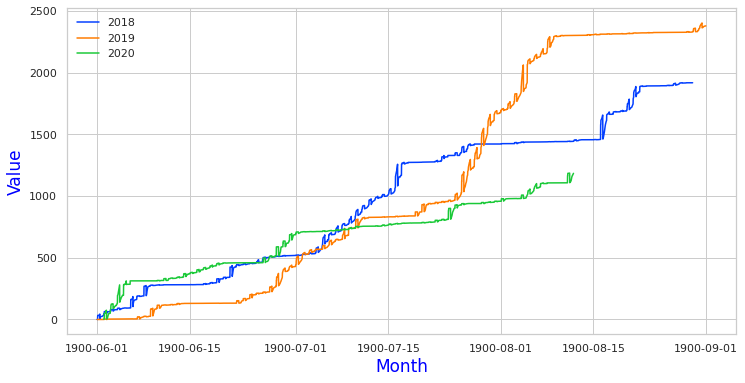

In [31]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.lineplot(piv.plotdate, piv['18sum'],label = '2018')
sns.lineplot(piv.plotdate, piv['19sum'],label = '2019')
sns.lineplot(piv.plotdate, piv['20sum'],label = '2020')
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.show()

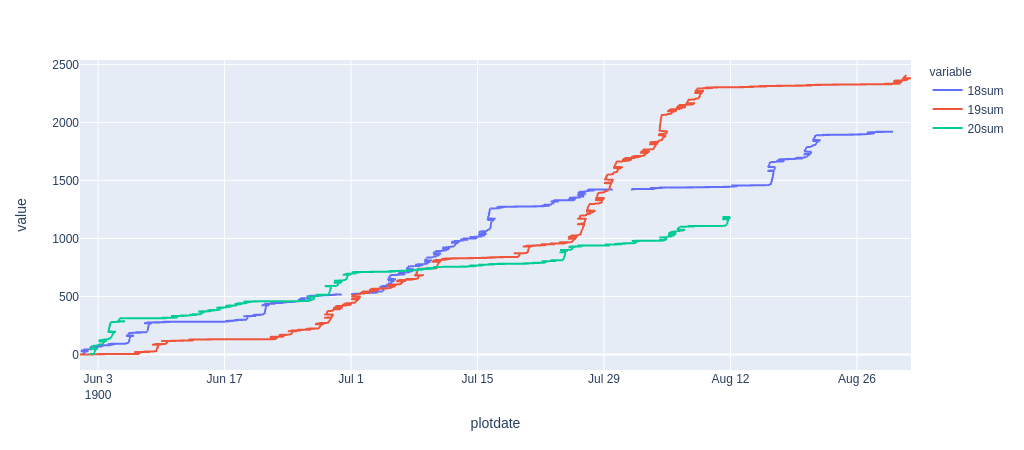

In [15]:
px.line(piv,'plotdate',['18sum','19sum','20sum'])

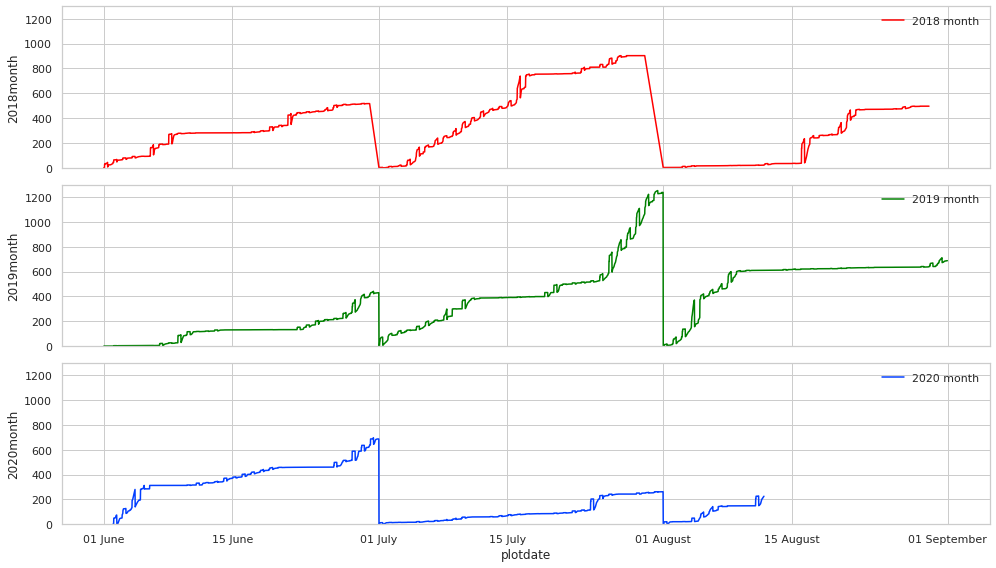

In [58]:
piv['2018month']=piv.groupby('month')[2018].cumsum()
piv['2019month']=piv.groupby('month')[2019].cumsum()
piv['2020month']=piv.groupby('month')[2020].cumsum()
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(14,8),sharex=True)
sns.lineplot(piv.plotdate,piv['2018month'],label = '2018 month',ax=ax1,color='red')
sns.lineplot(piv['plotdate'],piv['2019month'],label = '2019 month',ax=ax2,color='green')
sns.lineplot(piv['plotdate'],piv['2020month'],label = '2020 month',ax=ax3)
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
ax3.xaxis.set_major_formatter(myFmt)
ax1.set_ylim(0,1300)
ax2.set_ylim(0,1300)
ax3.set_ylim (0,1300)
plt.tight_layout()
plt.show()

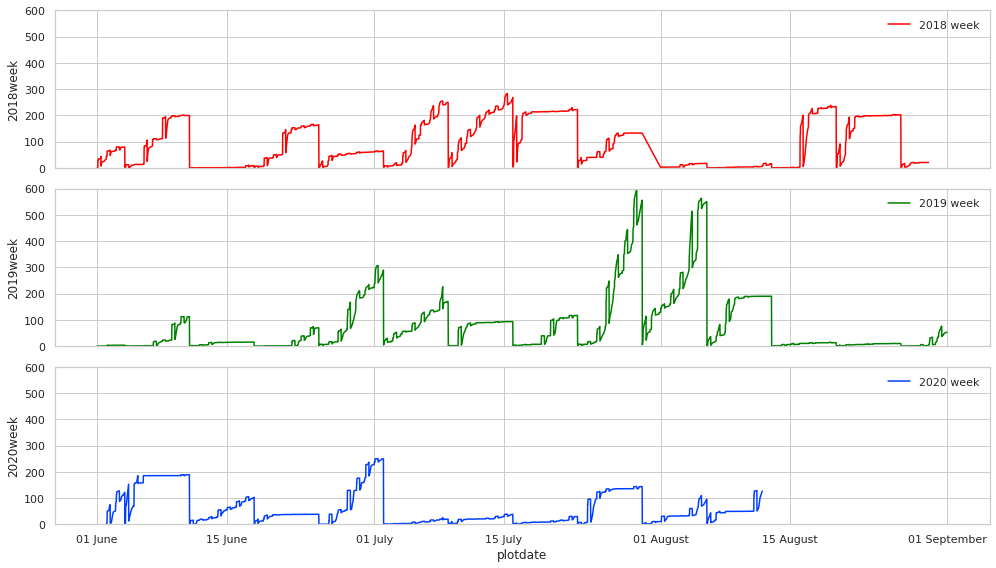

In [59]:
piv['2018week']=piv.groupby('week')[2018].cumsum()
piv['2019week']=piv.groupby('week')[2019].cumsum()
piv['2020week']=piv.groupby('week')[2020].cumsum()
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(14,8),sharex=True)
sns.lineplot(piv['plotdate'],piv['2018week'],label = '2018 week',ax=ax1,color='red')
sns.lineplot(piv['plotdate'],piv['2019week'],label = '2019 week',ax=ax2,color='green')
sns.lineplot(piv['plotdate'],piv['2020week'],label = '2020 week',ax=ax3)
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
ax3.xaxis.set_major_formatter(myFmt)
ax1.set_ylim(0,600)
ax2.set_ylim(0,600)
ax3.set_ylim (0,600)
ax.tick_params(axis='both', which='major', labelsize=15)
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()

In [60]:
piv['1819m'] = np.sqrt(abs(np.square(piv['2018month']) - np.square(piv['2019month'])))
piv['1920m'] = np.sqrt(abs(np.square(piv['2019month']) - np.square(piv['2020month'])))
piv['1820m'] = np.sqrt(abs(np.square(piv['2018month']) - np.square(piv['2020month'])))

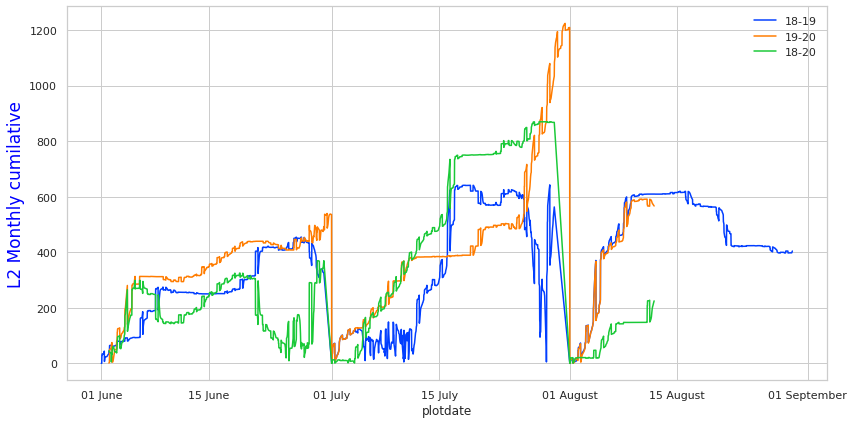

In [61]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.lineplot(piv.plotdate,piv['1819m'], label = '18-19')
sns.lineplot(piv.plotdate,piv['1920m'], label = '19-20')
sns.lineplot(piv.plotdate,piv['1820m'], label = '18-20')
ax.set_ylabel('L2 Monthly cumilative', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()

In [62]:
piv['18st'] = piv[2018].mean()
piv['18st'] = piv['18st'].cumsum()
piv['19st'] = piv[2019].mean()
piv['19st'] = piv['19st'].cumsum()
piv['20st'] = piv[2020].mean()
piv['20st'] = piv['20st'].cumsum()
piv.head(2)

Y          2018  2019  2020            plotdate  18sum  19sum  20sum  month  \
doy                                                                           
152-0-0   0.036   0.0   NaN 1900-06-01 00:00:00  0.036    0.0    NaN      6   
152-0-30  0.056   0.0   NaN 1900-06-01 00:30:00  0.092    0.0    NaN      6   

Y         week  2018month  ...  2020month  2018week  2019week  2020week  \
doy                        ...                                            
152-0-0     22      0.036  ...        NaN     0.036       0.0       NaN   
152-0-30    22      0.092  ...        NaN     0.092       0.0       NaN   

Y         1819m  1920m  1820m      18st      19st      20st  
doy                                                          
152-0-0   0.036    NaN    NaN  0.459626  0.544408  0.348362  
152-0-30  0.092    NaN    NaN  0.919251  1.088815  0.696724  

[2 rows x 21 columns]

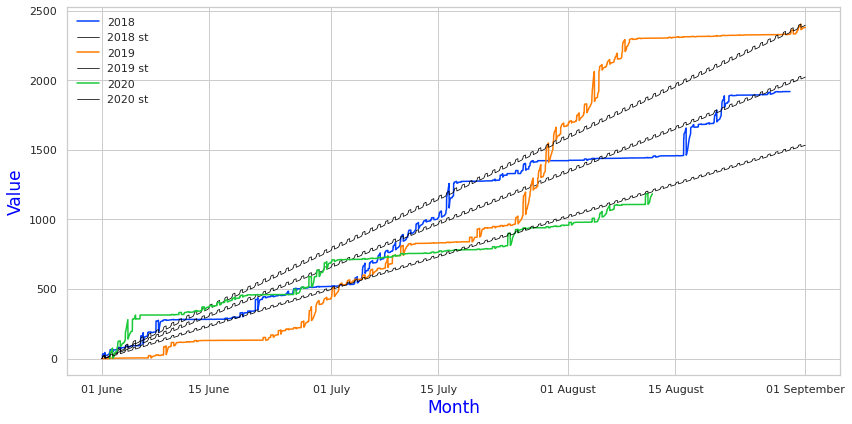

In [63]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.lineplot(piv.plotdate, piv['18sum'],label = '2018')
sns.lineplot(piv.plotdate, piv['18st'],label = '2018 st',color='black',linewidth=0.75)
sns.lineplot(piv.plotdate, piv['19sum'],label = '2019')
sns.lineplot(piv.plotdate, piv['19st'],label = '2019 st',color='black',linewidth=0.75)
sns.lineplot(piv.plotdate, piv['20sum'],label = '2020')
sns.lineplot(piv.plotdate, piv['20st'],label = '2020 st',color='black',linewidth=0.75)
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()

In [64]:
piv['18L2'] = np.sqrt(abs(np.square(piv['18sum']) - np.square(piv['18st'])))
piv['19L2'] = np.sqrt(abs(np.square(piv['19sum']) - np.square(piv['19st'])))
piv['20L2'] = np.sqrt(abs(np.square(piv['20sum']) - np.square(piv['20st'])))
piv['18dif'] = abs(piv['18sum'] - piv['18st'])
piv['19dif'] = abs(piv['19sum'] - piv['19st'])
piv['20dif'] = abs(piv['20sum'] - piv['20st'])

[]

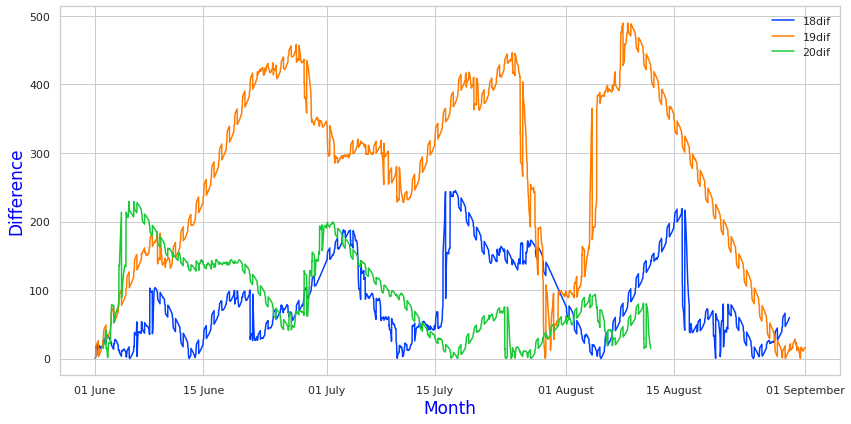

In [65]:
fig, ax = plt.subplots(1,1,figsize = (12,6))
sns.lineplot(piv.plotdate,piv['18dif'],label = '18dif')
sns.lineplot(piv.plotdate,piv['19dif'],label = '19dif')
sns.lineplot(piv.plotdate,piv['20dif'],label = '20dif')
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Difference', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.plot()

[]

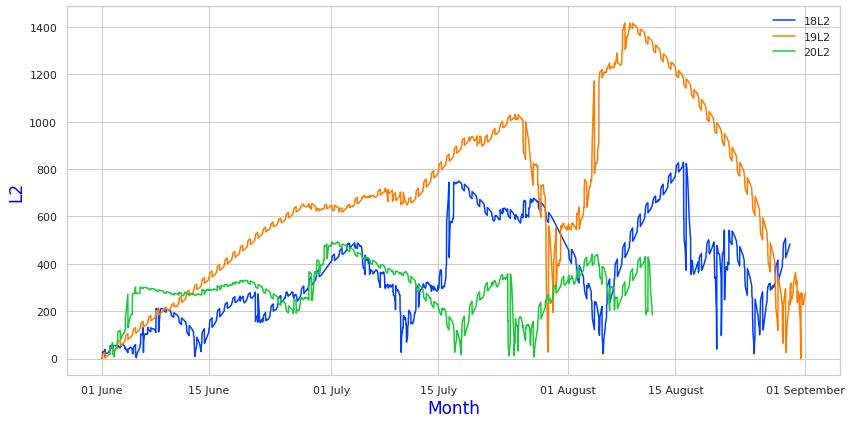

In [66]:
fig, ax = plt.subplots(1,1,figsize = (12,6))
sns.lineplot(piv.plotdate,piv['18L2'],label = '18L2')
sns.lineplot(piv.plotdate,piv['19L2'],label = '19L2')
sns.lineplot(piv.plotdate,piv['20L2'],label = '20L2')
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('L2', fontsize=17,c='blue')
myFmt = DateFormatter("%d %B")
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.plot()

In [67]:
res = mk.original_test(piv[2018])
res

Mann_Kendall_Test(trend='decreasing', h=True, p=8.621508572992376e-05, z=-3.9264324623975773, Tau=-0.039879895381650494, s=-347649.0, var_s=7839406906.333333, slope=0.0, intercept=0.02)

In [68]:
res = mk.original_test(piv[2019])
res

Mann_Kendall_Test(trend='increasing', h=True, p=3.528677018804771e-06, z=4.63737158592185, Tau=0.045506097460895824, s=443608.0, var_s=9150671982.666666, slope=0.0, intercept=0.014)

In [47]:
res = mk.original_test(piv[2020])
res

Mann_Kendall_Test(trend='decreasing', h=True, p=0.021861521991809685, z=-2.2927652789527824, Tau=-0.0255432408559566, s=-148292.0, var_s=4183217014.0, slope=0.0, intercept=0.0085)

In [79]:
pivjune = piv[piv.plotdate.dt.month == 6]
pivjuly = piv[piv.plotdate.dt.month == 7]
pivaug = piv[piv.plotdate.dt.month == 8]
pivjune

Y          2018   2019   2020            plotdate  18sum    19sum    20sum  \
doy                                                                          
152-0-0   0.036  0.000    NaN 1900-06-01 00:00:00  0.036    0.000      NaN   
152-0-30  0.056  0.000    NaN 1900-06-01 00:30:00  0.092    0.000      NaN   
152-1-0   0.065  0.000    NaN 1900-06-01 01:00:00  0.157    0.000      NaN   
152-1-30  0.051  0.000    NaN 1900-06-01 01:30:00  0.208    0.000      NaN   
152-10-0  6.418  0.000    NaN 1900-06-01 10:00:00  6.626    0.000      NaN   
...         ...    ...    ...                 ...    ...      ...      ...   
181-7-30    NaN  1.169  1.545 1900-06-30 07:30:00    NaN  435.176  689.939   
181-8-0     NaN  1.253  1.643 1900-06-30 08:00:00    NaN  436.429  691.582   
181-8-30    NaN  1.836  0.787 1900-06-30 08:30:00    NaN  438.265  692.369   
181-9-0     NaN  1.690  0.876 1900-06-30 09:00:00    NaN  439.955  693.245   
181-9-30    NaN  0.902  3.549 1900-06-30 09:30:00    NaN  440.857  696.794   

Y         month  week  2018month  ...  1820m        18st        19st  \
doy                               ...                                  
152-0-0       6    22      0.036  ...    NaN    0.459626    0.544408   
152-0-30      6    22      0.092  ...    NaN    0.919251    1.088815   
152-1-0       6    22      0.157  ...    NaN    1.378877    1.633223   
152-1-30      6    22      0.208  ...    NaN    1.838503    2.177630   
152-10-0      6    22      6.626  ...    NaN    2.298129    2.722038   
...         ...   ...        ...  ...    ...         ...         ...   
181-7-30      6    26        NaN  ...    NaN  660.022532  781.769326   
181-8-0       6    26        NaN  ...    NaN  660.482157  782.313734   
181-8-30      6    26        NaN  ...    NaN  660.941783  782.858141   
181-9-0       6    26        NaN  ...    NaN  661.401409  783.402549   
181-9-30      6    26        NaN  ...    NaN  661.861034  783.946957   

Y               20st      18L2        19L2        20L2     18dif       19dif  \
doy                                                                            
152-0-0     0.348362  0.458214    0.544408         NaN  0.423626    0.544408   
152-0-30    0.696724  0.914636    1.088815         NaN  0.827251    1.088815   
152-1-0     1.045086  1.369910    1.633223         NaN  1.221877    1.633223   
152-1-30    1.393448  1.826699    2.177630         NaN  1.630503    2.177630   
152-10-0    1.741810  6.214699    2.722038         NaN  4.327871    2.722038   
...              ...       ...         ...         ...       ...         ...   
181-7-30  500.247960       NaN  649.449866  475.150294       NaN  346.593326   
181-8-0   500.596322       NaN  649.264589  477.167670       NaN  345.884734   
181-8-30  500.944684       NaN  648.683790  477.942732       NaN  344.593141   
181-9-0   501.293046       NaN  648.196846  478.846439       NaN  343.447549   
181-9-30  501.641408       NaN  648.242189  483.609115       NaN  343.089957   

Y              20dif  
doy                   
152-0-0          NaN  
152-0-30         NaN  
152-1-0          NaN  
152-1-30         NaN  
152-10-0         NaN  
...              ...  
181-7-30  189.691040  
181-8-0   190.985678  
181-8-30  191.424316  
181-9-0   191.951954  
181-9-30  195.152592  

[1440 rows x 27 columns]

In [83]:
res = mk.seasonal_test(pivjune[2020])
res

Seasonal_Mann_Kendall_Test(trend='decreasing', h=True, p=0.0015633798484224748, z=-3.1626540690990166, Tau=-0.05549725137431284, s=-4442.0, var_s=1971778.666666667, slope=0.0, intercept=0.008)

In [77]:
res = mk.original_test(pivjuly[2020])
res

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0064933086788567795, z=-2.7217711741366117, Tau=-0.04620239205732839, s=-51115.0, var_s=352676495.6666667, slope=0.0, intercept=0.008)

In [78]:
res = mk.original_test(pivaug[2020])
res

Mann_Kendall_Test(trend='no trend', h=False, p=0.581952847632961, z=0.5505344604214355, Tau=0.015525271692254615, s=2160.0, var_s=15379289.333333334, slope=0.0, intercept=0.01)

In [93]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [86]:
path = dtw.warping_path(piv['18sum'], piv['19sum'])
dtwvis.plot_warping(piv['18sum'], piv['19sum'], path,filename="warp.png")

KeyboardInterrupt: 

In [129]:
#s1 = piv.as_matrix(columns = piv['18sum'])

s1 = piv[2018].iloc[850:1000]
s2 = piv[2019].iloc[850:1000]
s1

doy
169-3-0     0.472
169-3-30    0.264
169-4-0     0.084
169-4-30    0.082
169-5-0     0.040
            ...  
172-3-30    0.000
172-4-0     0.000
172-4-30    0.000
172-5-0     0.001
172-5-30    0.006
Name: 2018, Length: 150, dtype: float64

In [127]:
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])

In [130]:
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path, filename="warp.png")

(None, None)